In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic= pd.read_csv("C:/SummerProjects/Titanic Data/train (1).csv") #loading the dataset

In [3]:
titanic.head() #preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


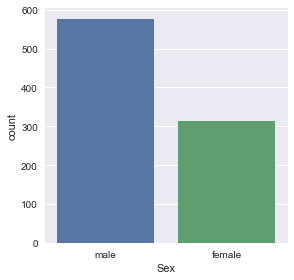

In [5]:
sns.factorplot('Sex', data=titanic, kind='count')

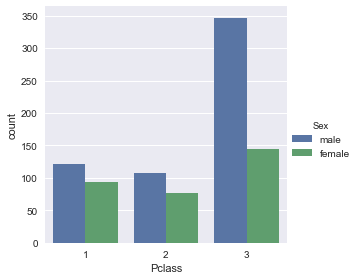

In [6]:
sns.factorplot('Pclass', data=titanic, hue='Sex', kind='count')

In [7]:
def male_female_child(passenger):
    age,sex= passenger
    
    if age< 16:
        return 'child'
    else:
        return sex

In [8]:
titanic['Person']= titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


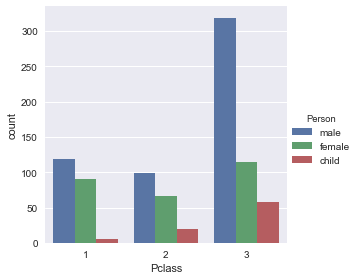

In [10]:
sns.factorplot('Pclass', data=titanic, hue='Person',kind='count')

In [11]:
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

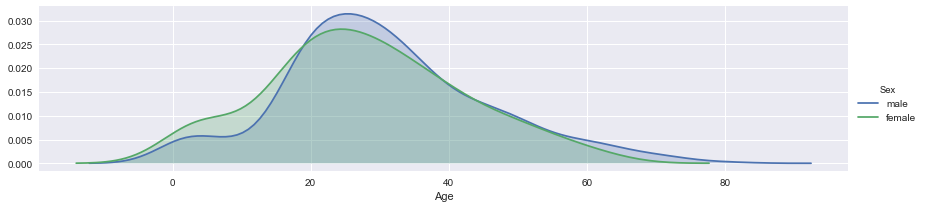

In [12]:
fig= sns.FacetGrid(titanic, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.add_legend()


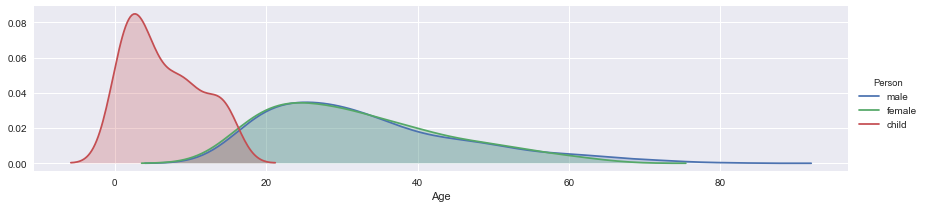

In [13]:
fig= sns.FacetGrid(titanic, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.add_legend()

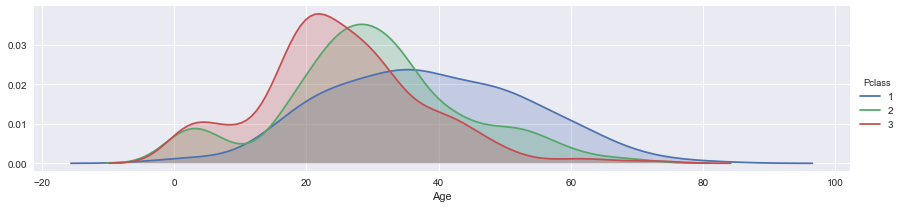

In [14]:
fig= sns.FacetGrid(titanic, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.add_legend()

In [15]:
deck= titanic['Cabin'].dropna()

In [16]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

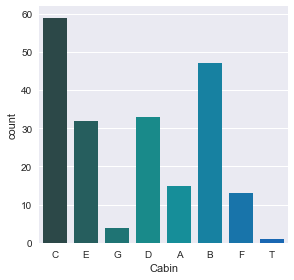

In [17]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin= DataFrame(levels)
cabin.columns=['Cabin']
sns.factorplot('Cabin',data=cabin,palette='winter_d', kind='count')

In [18]:
titanic['Alone']= titanic.SibSp+titanic.Parch #nonzero value implies that they had family aboard

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [24]:
titanic['Alone'].loc[titanic['Alone']>0]='With Family'

In [25]:
titanic['Alone'].loc[titanic['Alone'] ==0]='No Family'

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No Family


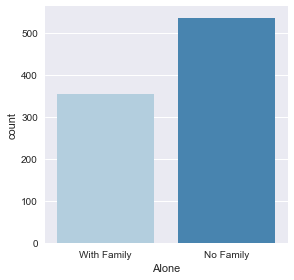

In [28]:
sns.factorplot('Alone', data=titanic, palette='Blues', kind='count')

In [29]:
titanic['Survivor']= titanic.Survived.map({0:'no', 1:'yes'})

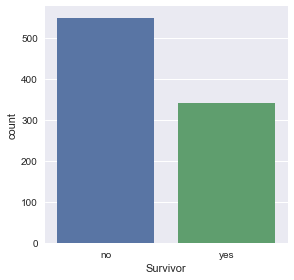

In [31]:
sns.factorplot('Survivor', data=titanic, kind= 'count')

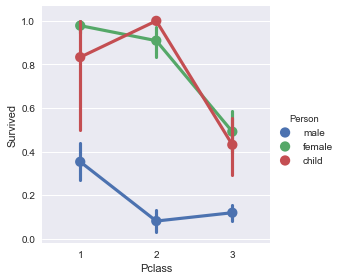

In [34]:
sns.factorplot('Pclass','Survived',hue='Person', data=titanic)

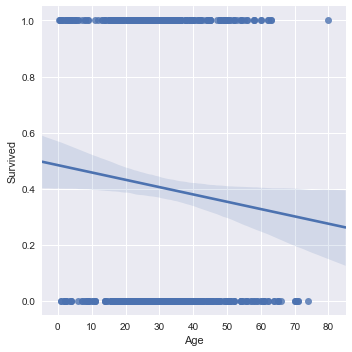

In [35]:
sns.lmplot('Age','Survived', data=titanic)

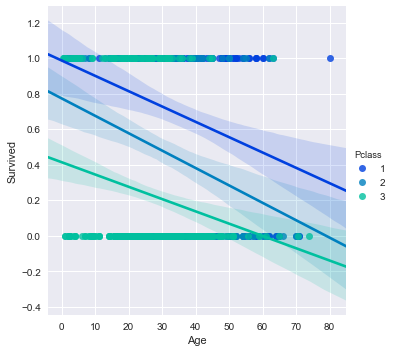

In [38]:
sns.lmplot('Age','Survived',hue='Pclass', data=titanic,palette='winter')

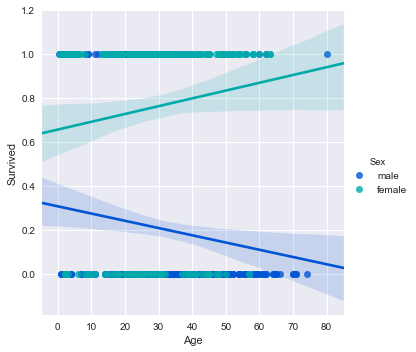

In [39]:
sns.lmplot('Age','Survived',hue='Sex', data=titanic,palette='winter')